In [1]:
#Importing all the libraries that we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [4]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

# Columns description
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


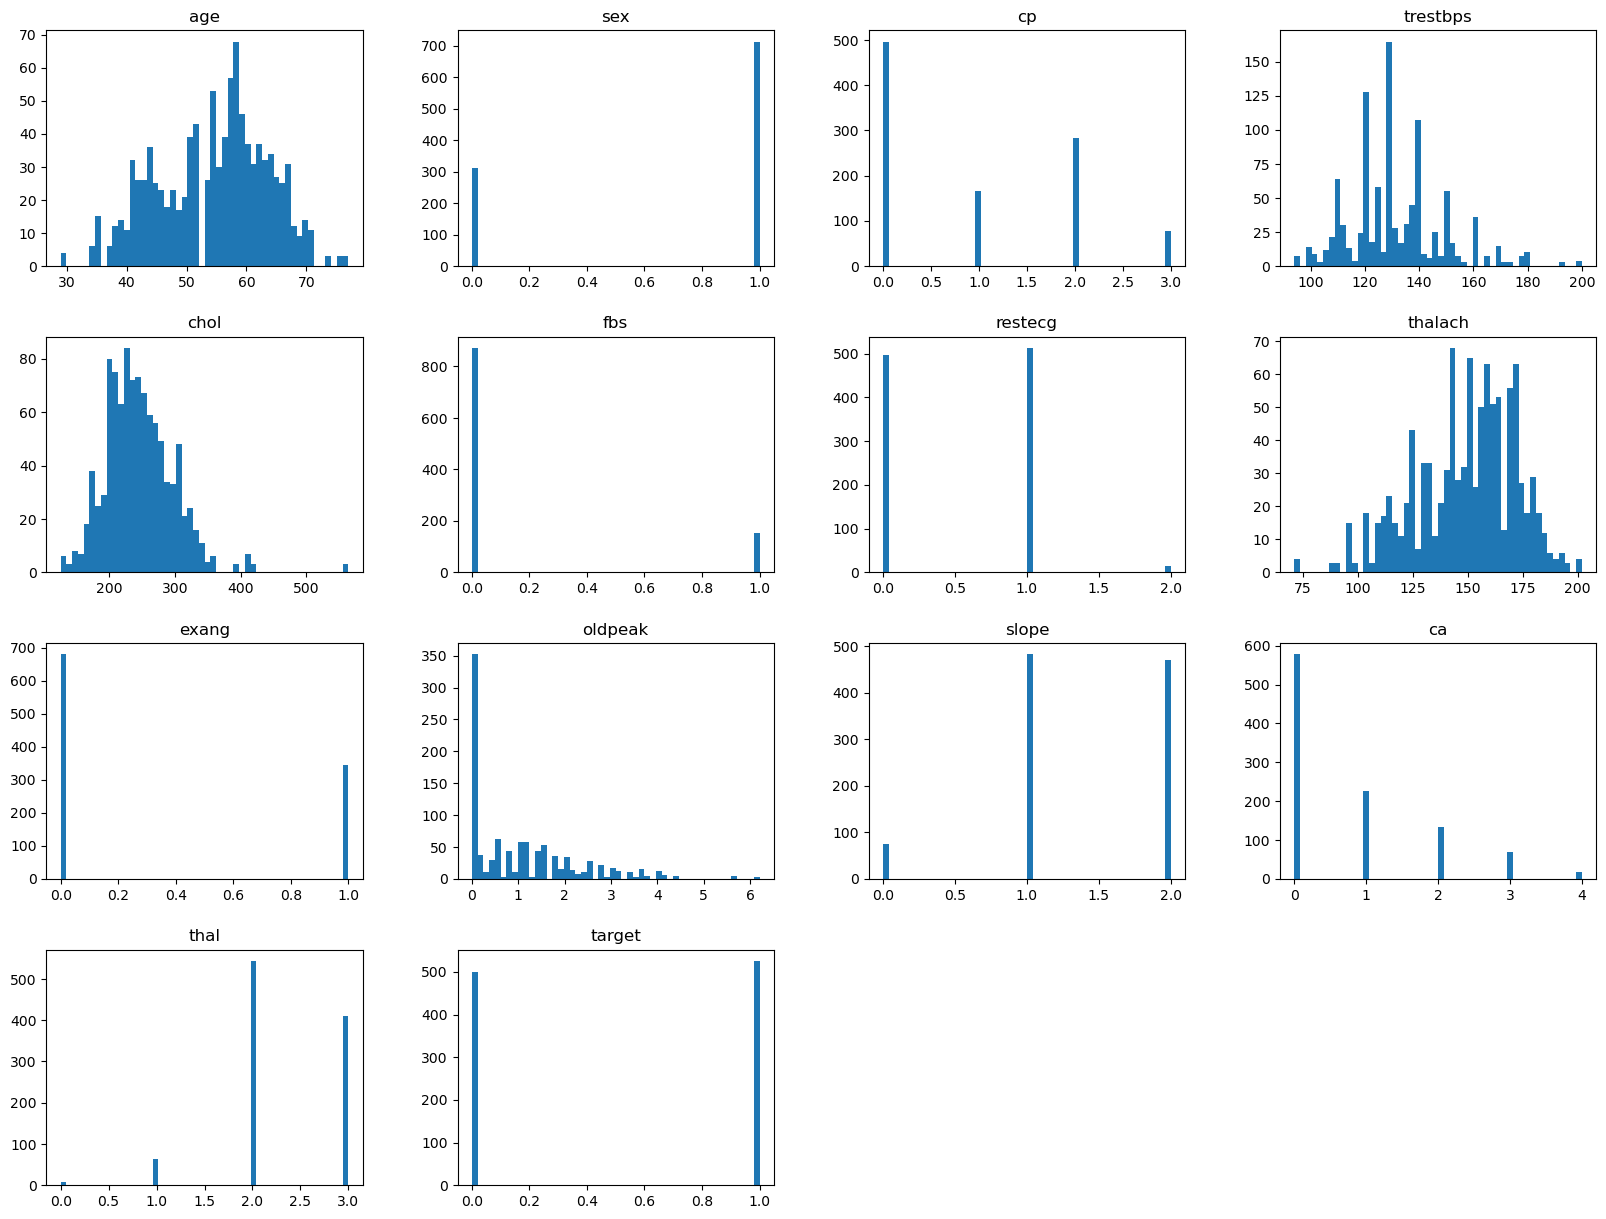

In [8]:
df.hist(bins = 50, grid = False, figsize = (20, 15));

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Analysis

Data analysis is about answering questions. Let's define some question as a list.

In [10]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ", 
             "2. People of which sex has most heart disease?",
             "3. People of which sex has which type of chest pain most?",
             "4. People with which chest pain are most pron to have heart disease?",
             "5. Age vs Maximum heart rate when people have heart disease.",
             "6. Age vs Maximum heart rate when people doesn't have heart disease.",
             "7. Age vs serum cholestoral when people have heart disease.",
             "8 Age vs serum cholestoral when people doesn't have heart disease.",
             "9. People of which sex has more exercise induced angina?",
             "10. Which sex of people has more fasting blood sugar > 120 mg/dl?"
            ]

In [12]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

Let's find the answer of first question.

How many people have heart disease and how many people doesn't have heart disease?# 

# Finndiing answer of 1st questions

In [14]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

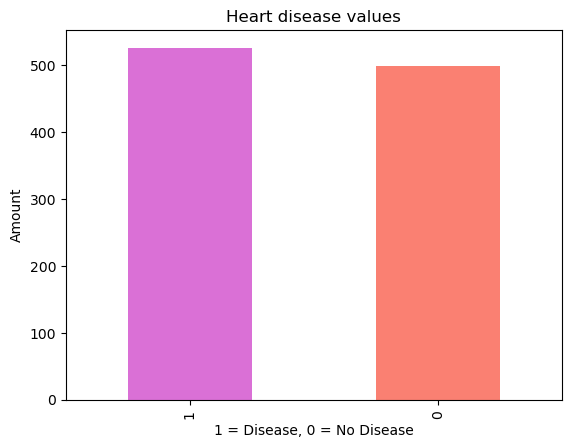

In [16]:
df.target.value_counts().plot(kind = 'bar', color = ['orchid','salmon'])
plt.title("Heart disease values")
plt.xlabel("1 = Disease, 0 = No Disease")
plt.ylabel("Amount");

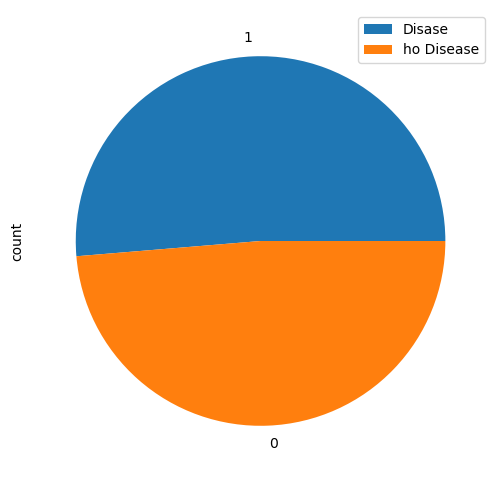

In [17]:
df.target.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(["Disase","ho Disease"]);

# Finding answer of 2nd question

In [18]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [19]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

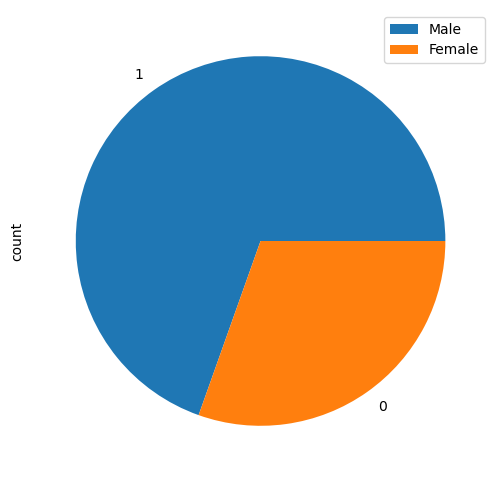

In [20]:
df.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(['Male', 'Female']);

In [21]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


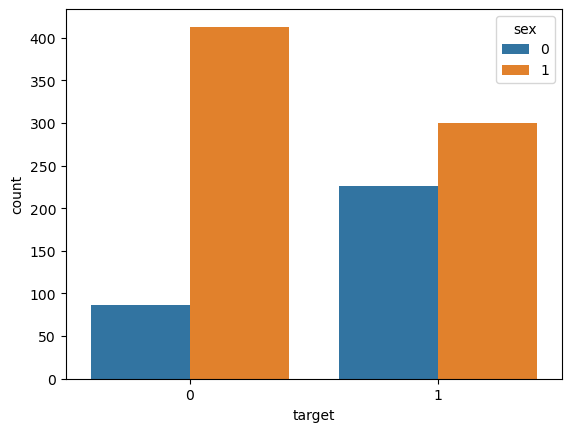

In [22]:
sns.countplot(x = 'target', data = df, hue = 'sex');

# Fiinding answer of question 3

In [23]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [24]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

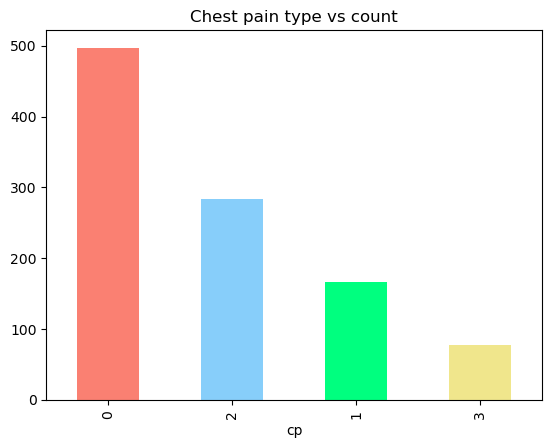

In [25]:
df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title('Chest pain type vs count');

In [26]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


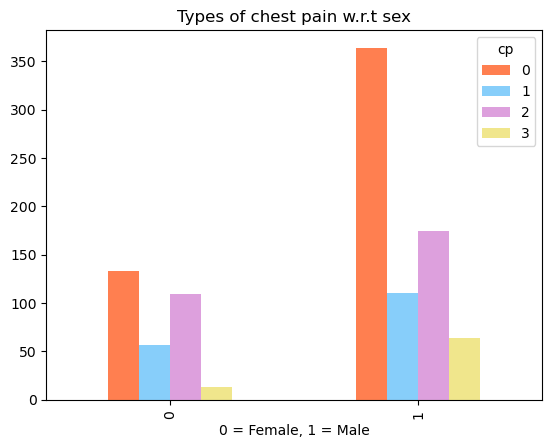

In [28]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title("Types of chest pain w.r.t sex")
plt.xlabel("0 = Female, 1 = Male");

# Finding answer of question 4

In [29]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [31]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


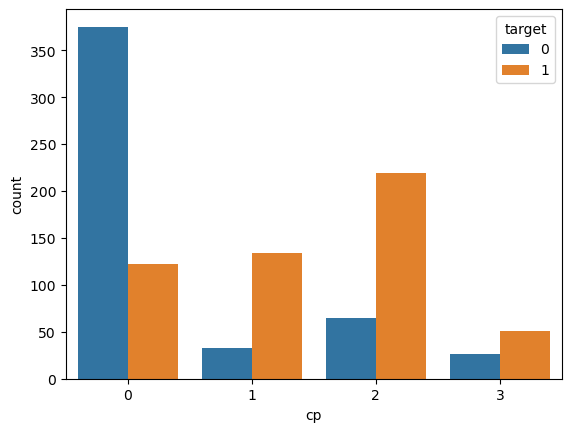

In [32]:
sns.countplot(x = 'cp', data = df, hue = 'target');

# 5 & 6 question

In [34]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

C:\Users\Programmer Delowar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


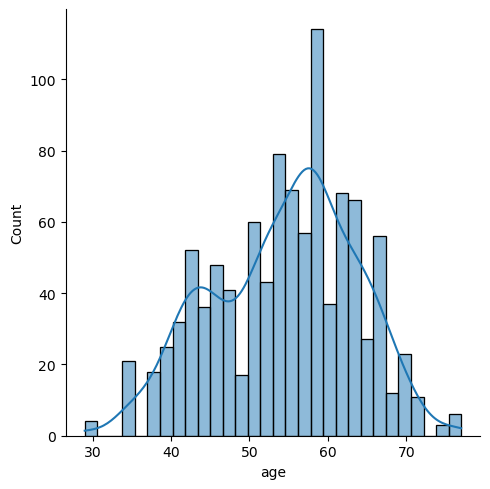

In [35]:
sns.displot(x = 'age', data = df, bins = 30, kde = True);

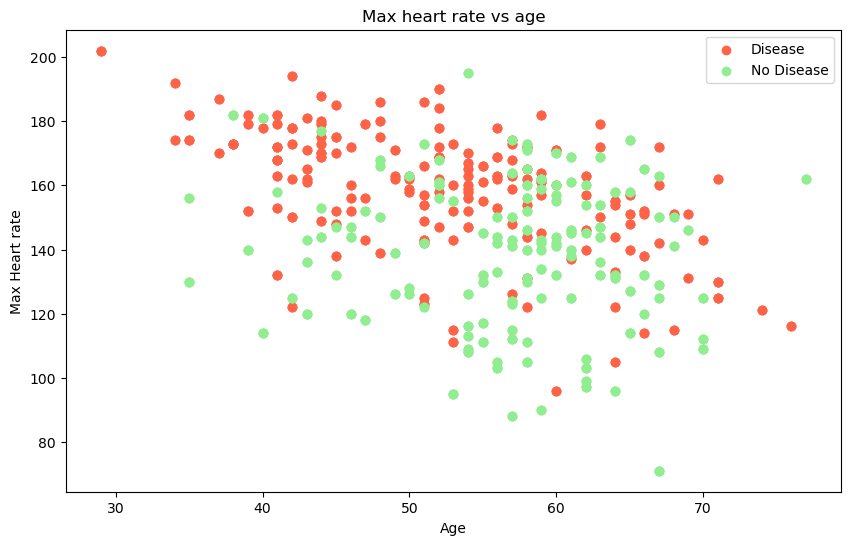

In [42]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = 'tomato')

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = 'lightgreen')

plt.title("Max heart rate vs age")
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Disease', 'No Disease']);

In [43]:
df.age[df.target == 1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

# 7 & 8 questions

In [44]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

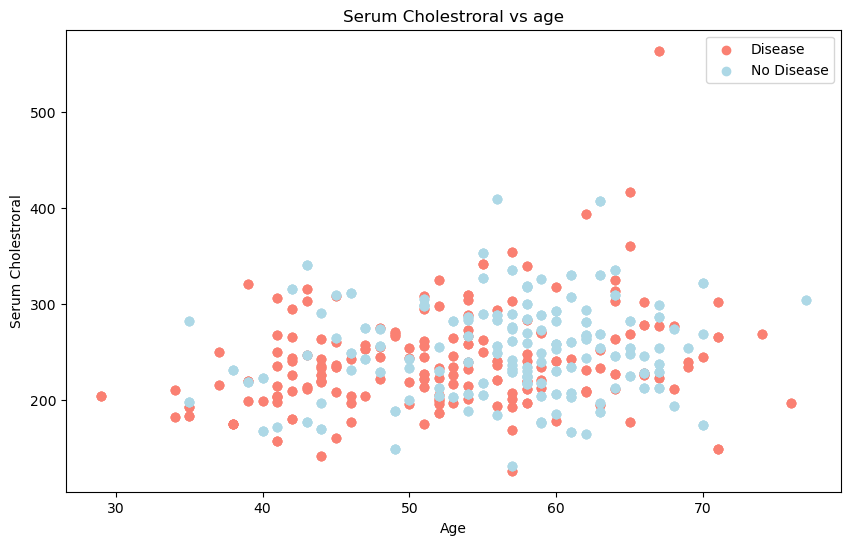

In [45]:
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.target == 1],
           df.chol[df.target == 1],
           c = 'salmon')

plt.scatter(df.age[df.target == 0],
           df.chol[df.target == 0],
           c = 'lightblue')

plt.title("Serum Cholestroral vs age")
plt.xlabel('Age')
plt.ylabel('Serum Cholestroral')
plt.legend(['Disease', 'No Disease']);

# Finding answerr of question 9

In [46]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [48]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


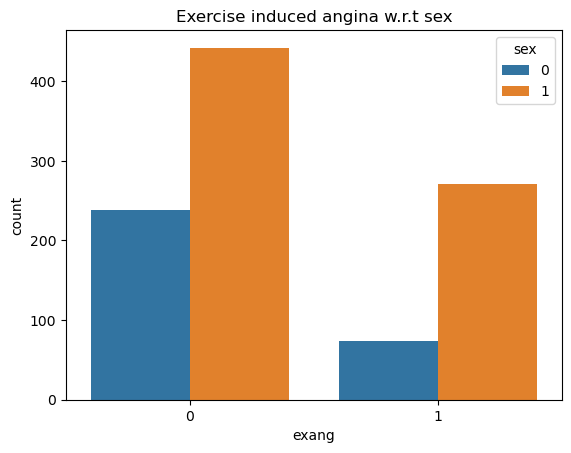

In [49]:
sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title("Exercise induced angina w.r.t sex");

In [50]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']